# DSCI-508 Project 6 - Graph Coding Assignment
### Matt Snyder

In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Load dataframe from file

In [2]:
df = pd.read_csv('mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

### Encode the year as numeric columns

In [21]:
year_df = df[['year']]
year_labels = sorted(year_df['year'].unique())
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(year_df)
year_enc = encoder.transform(year_df)
year_enc_df = pd.DataFrame(year_enc.astype('int'))
year_enc_df.columns = year_labels
df_enc = pd.concat([df, year_enc_df], axis=1)
df_enc.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,1999,2008
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,1,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0,1
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0,1
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1,0


### group by displacement and year, then aggregate counts

In [8]:
df_grouped = df.groupby(['displ','year']).size().reset_index(name='counts')
df_grouped.head()

,displ,year,counts
0,1.6,1999,5
1,1.8,1999,9
2,1.8,2008,5
3,1.9,1999,3
4,2.0,1999,8


In [ ]:
df_grouped = df.groupby('displ').size().reset_index(name='counts')
df_grouped.head()

<Axes: xlabel='displ'>

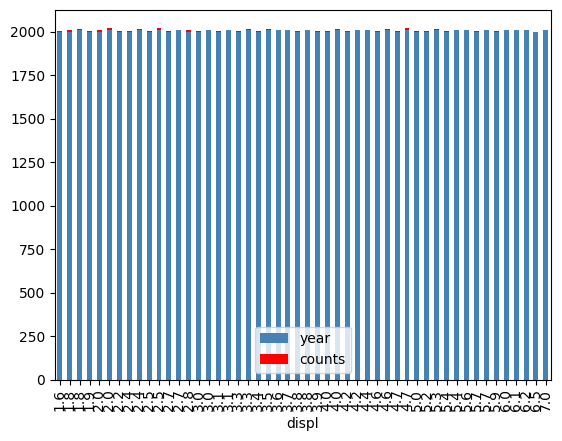

In [9]:
df_grouped.set_index('displ').plot(kind='bar', stacked=True, color=['steelblue', 'red'])